In [ ]:
import tensorflow as tf

In [ ]:
print(tf.__version__)

2.13.0


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

###Data Preprocessing

In [ ]:
# Importing the Libraries
from tensorflow.keras.datasets import mnist

In [ ]:
# Loading the Datasets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [ ]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [ ]:
y_train.shape, y_test.shape

((60000,), (10000,))

In [ ]:
x_train.min(), x_train.max()

(0, 255)

In [ ]:
y_train.min(), y_train.max()

(0, 9)

In [ ]:
# Normalize the Dataset

x_train = x_train/255.0
x_test = x_test/255.0

In [ ]:
x_train.min(), x_train.max()

(0.0, 1.0)

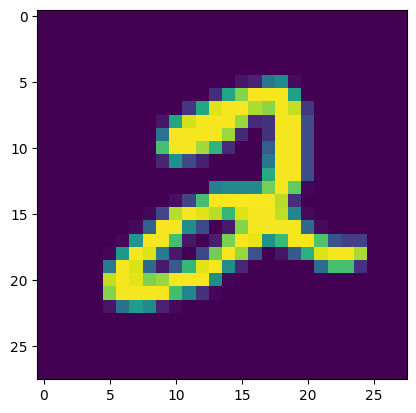

In [ ]:
plt.imshow(x_train[5])

In [ ]:
y_train[5]

2

### Build the LSTM

In [ ]:
model = tf.keras.models.Sequential()

In [ ]:
# First LSTM Layer
model.add(tf.keras.layers.LSTM(units=128, activation="relu", return_sequences=True, input_shape=(28, 28)))
model.add(tf.keras.layers.Dropout(0.2))

# Second LSTM Layer
model.add(tf.keras.layers.LSTM(units=128, activation="relu"))
model.add(tf.keras.layers.Dropout(0.2))

# Fully connected Layer (First Dense Layer)
model.add(tf.keras.layers.Dense(units=32, activation="relu"))
model.add(tf.keras.layers.Dropout(0.2))

# Output Layer
model.add(tf.keras.layers.Dense(units=10, activation="softmax"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 28, 128)           80384     
                                                                 
 dropout (Dropout)           (None, 28, 128)           0         
                                                                 
 lstm_1 (LSTM)               (None, 128)               131584    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense (Dense)               (None, 32)                4128      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                3

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.001)

In [ ]:
# Compile the Model
model.compile(
    optimizer=opt,
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

### Training the Model

In [ ]:
history = model.fit(
    x_train,
    y_train,
    epochs=10,
    validation_data = (x_test, y_test)
)

Epoch 1/10
1875/1875 [==============================] - 99s 49ms/step - loss: 0.6320 - accuracy: 0.7924 - val_loss: 0.1539 - val_accuracy: 0.9555
Epoch 2/10
1875/1875 [==============================] - 93s 49ms/step - loss: 0.1579 - accuracy: 0.9590 - val_loss: 0.1120 - val_accuracy: 0.9689
Epoch 3/10
1875/1875 [==============================] - 125s 67ms/step - loss: 0.1067 - accuracy: 0.9714 - val_loss: 0.0648 - val_accuracy: 0.9801
Epoch 4/10
1875/1875 [==============================] - 123s 65ms/step - loss: 0.0799 - accuracy: 0.9789 - val_loss: 0.0624 - val_accuracy: 0.9837
Epoch 5/10
1875/1875 [==============================] - 96s 51ms/step - loss: 0.0694 - accuracy: 0.9814 - val_loss: 0.0523 - val_accuracy: 0.9840
Epoch 6/10
1875/1875 [==============================] - 97s 52ms/step - loss: 0.0583 - accuracy: 0.9843 - val_loss: 0.0477 - val_accuracy: 0.9865
Epoch 7/10
1875/1875 [==============================] - 95s 51ms/step - loss: 0.0506 - accuracy: 0.9861 - val_loss: 0.0500

In [ ]:
# Predictions

y_pred = np.argmax(model.predict(x_test), axis=1)

313/313 [==============================] - 4s 10ms/step


In [ ]:
print(y_pred[0]), print(y_test[0])

7
7


(None, None)

In [ ]:
print(y_pred[10]), print(y_test[10])

0
0


(None, None)

In [ ]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix, accuracy_score    # , top_k_accuracy_score

cm = confusion_matrix(y_test, y_pred)

print(cm)

[[ 975    0    1    1    0    0    2    1    0    0]
 [   0 1132    1    0    0    0    0    1    1    0]
 [   1    0 1029    1    1    0    0    0    0    0]
 [   0    0    4 1004    0    1    0    1    0    0]
 [   0    0    1    0  971    0    4    1    1    4]
 [   0    0    3    8    0  876    1    0    2    2]
 [   3    2    3    0    0    1  946    0    3    0]
 [   0    1   17    2    3    0    0 1000    1    4]
 [   3    1    3    0    0    0    1    0  965    1]
 [   2    0    0    0    8    1    0    2    5  991]]


In [ ]:
acc_cm = accuracy_score(y_test, y_pred)
print(acc_cm)

0.9889


In [ ]:
def learning_curve(history, epoch):

  # training vs validation accuracy
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # training vs validation loss
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model Loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

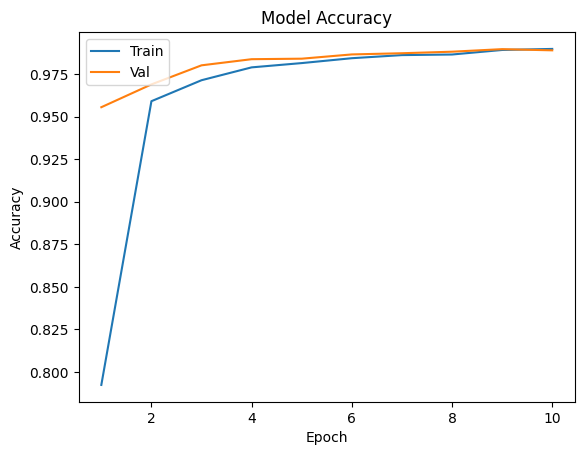

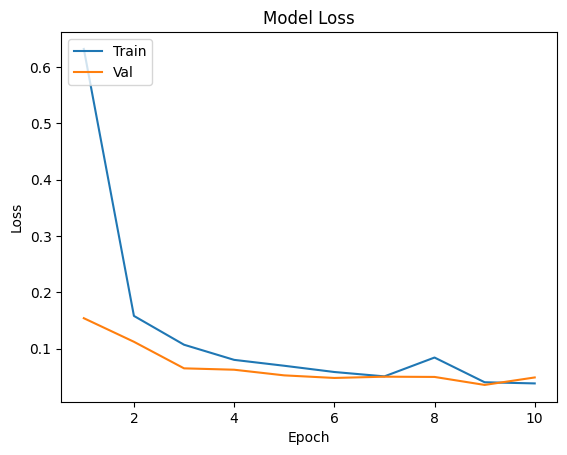

In [ ]:
learning_curve(history, 10)